**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,auc,classification_report,cohen_kappa_score,confusion_matrix,f1_score

#### Load the csv file

In [2]:
# type your code here
data=pd.read_csv('emp_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


**Data Preparation**

In [3]:
df=data.copy()

In [4]:
# type your code here
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
data=data[~((data<q1-(1.5*iqr)) | (data>q3+(1.5*iqr))).any(axis=1)]

/var/folders/q3/7y2k2_t90hlgr_kg1ld6f41m0000gn/T/ipykernel_2087/1325805785.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data=data[~((data<q1-(1.5*iqr)) | (data>q3+(1.5*iqr))).any(axis=1)]


In [5]:
data.shape

(1487, 18)

**Encode the categorical variables.**

In [6]:
# type your code here
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
YearsAtCompany             0
dtype: int64

In [7]:
df_cat=data.select_dtypes(include=object)
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,OverTime
0,Yes,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Yes
1,Yes,Travel_Rarely,Sales,Medical,Male,Sales Executive,No
2,Yes,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,No
3,No,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Yes
4,No,Travel_Frequently,Research & Development,Life Sciences,Female,Manufacturing Director,No


In [8]:
data=pd.get_dummies(data,drop_first=True)

In [9]:
data.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,33,3,1,3,1,1,3348,1,11,3,...,1,0,0,0,0,0,1,0,0,1
1,32,4,4,1,3,4,10400,1,11,3,...,1,0,0,0,0,0,0,1,0,0
2,40,9,4,3,1,1,2018,3,14,3,...,1,0,1,0,0,0,0,0,0,0
3,42,7,2,4,2,2,2372,6,16,3,...,0,0,0,0,0,0,1,0,0,1
4,43,27,3,3,3,1,10820,8,11,3,...,0,0,0,0,1,0,0,0,0,0


In [10]:
# type your code here
x=data["Age"]
def age_cat(x):
    if x in range(18,31):
        return 'age_1'
    elif x in range(31,41):
        return 'age_2'
    elif x in range(41,51):
        return 'age_3'
    else:
        return 'age_4'

In [11]:
data['Age']=data['Age'].apply(age_cat)

In [12]:
data.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,age_2,3,1,3,1,1,3348,1,11,3,...,1,0,0,0,0,0,1,0,0,1
1,age_2,4,4,1,3,4,10400,1,11,3,...,1,0,0,0,0,0,0,1,0,0
2,age_2,9,4,3,1,1,2018,3,14,3,...,1,0,1,0,0,0,0,0,0,0
3,age_3,7,2,4,2,2,2372,6,16,3,...,0,0,0,0,0,0,1,0,0,1
4,age_3,27,3,3,3,1,10820,8,11,3,...,0,0,0,0,1,0,0,0,0,0


<AxesSubplot: xlabel='Age', ylabel='MonthlyIncome'>

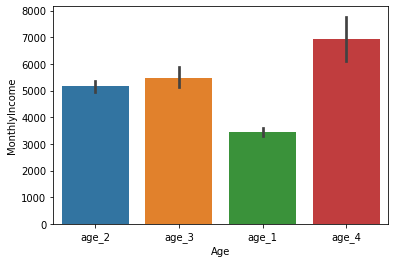

In [13]:
# type your code here
sns.barplot(x=data['Age'],y=data['MonthlyIncome'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Dummy encode the categorical variable "Age".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
df=pd.concat([data,enc],axis=1)

In [16]:
df.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,age_2,age_3,age_4
0,age_2,3,1,3,1,1,3348,1,11,3,...,0,0,0,1,0,0,1,1,0,0
1,age_2,4,4,1,3,4,10400,1,11,3,...,0,0,0,0,1,0,0,1,0,0
2,age_2,9,4,3,1,1,2018,3,14,3,...,0,0,0,0,0,0,0,1,0,0
3,age_3,7,2,4,2,2,2372,6,16,3,...,0,0,0,1,0,0,1,0,1,0
4,age_3,27,3,3,3,1,10820,8,11,3,...,0,1,0,0,0,0,0,0,1,0


In [17]:
df.drop(['Age'],axis=1,inplace=True)

In [18]:
df.head()

,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,age_2,age_3,age_4
0,3,1,3,1,1,3348,1,11,3,10,...,0,0,0,1,0,0,1,1,0,0
1,4,4,1,3,4,10400,1,11,3,14,...,0,0,0,0,1,0,0,1,0,0
2,9,4,3,1,1,2018,3,14,3,5,...,0,0,0,0,0,0,0,1,0,0
3,7,2,4,2,2,2372,6,16,3,1,...,0,0,0,1,0,0,1,0,1,0
4,27,3,3,3,1,10820,8,11,3,8,...,0,1,0,0,0,0,0,0,1,0


<a id="ada"> </a>
## 1. ADABoost

## We shall use the employee dataset

In [19]:
# type your code here
from sklearn.ensemble import AdaBoostClassifier

In [20]:
ada=AdaBoostClassifier(n_estimators=40)

In [21]:
df.columns

Index(['DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany',
       'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'OverTime_Yes', 'age_2', 'age_3',
       'age_4'],
      dtype='object')

In [22]:
x=df[['BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'OverTime_Yes', 'age_2', 'age_3',
       'age_4']]
y=df['Attrition_Yes']

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [24]:
model_1=ada.fit(xtrain,ytrain)

In [25]:
ypred_test=model_1.predict(xtest)
ypred_train=model_1.predict(xtrain)

In [26]:
score_test=classification_report(ytest,ypred_test)
print(score_test)

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       245
           1       0.71      0.67      0.69       202

    accuracy                           0.73       447
   macro avg       0.72      0.72      0.72       447
weighted avg       0.73      0.73      0.73       447



In [27]:
score_train=classification_report(ytrain,ypred_train)
print(score_train)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       570
           1       0.70      0.63      0.67       470

    accuracy                           0.71      1040
   macro avg       0.71      0.71      0.71      1040
weighted avg       0.71      0.71      0.71      1040



In [28]:
# type your code here
y=df['Attrition_Yes']
x=df.drop(['Attrition_Yes'],axis=1)
xtrainfull,xtestfull,ytrainfull,ytestfull=train_test_split(x,y,test_size=0.3,random_state=2)
full_model=ada.fit(xtrainfull,ytrainfull)
ypredtrainfull=full_model.predict(xtrainfull)
ypredtestfull=full_model.predict(xtestfull)
full_score_train=classification_report(ytrainfull,ypredtrainfull)
full_score_test=classification_report(ytestfull,ypredtestfull)
print(full_score_train)
print(full_score_test)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       583
           1       0.80      0.78      0.79       457

    accuracy                           0.82      1040
   macro avg       0.82      0.81      0.81      1040
weighted avg       0.82      0.82      0.82      1040

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       232
           1       0.78      0.69      0.73       215

    accuracy                           0.76       447
   macro avg       0.76      0.76      0.76       447
weighted avg       0.76      0.76      0.76       447



In [29]:
# type your code here
from sklearn.metrics import roc_curve,roc_auc_score

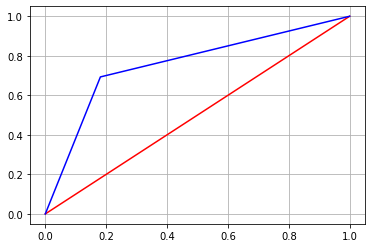

In [30]:
fpr,tpr,thres=roc_curve(ytestfull,ypredtestfull)
plt.plot([0,1],[0,1],'r')
plt.grid()
plt.plot(fpr,tpr,'blue')

<AxesSubplot: >

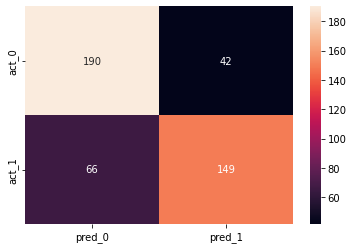

In [31]:
# type your code here
cm=confusion_matrix(ytestfull,ypredtestfull)
matrix=pd.DataFrame(cm,columns=['pred_0','pred_1'],index=['act_0','act_1'])
sns.heatmap(matrix,annot=True,fmt='d')

In [32]:
# type your code here
from sklearn.metrics import recall_score,precision_score
sensitivity=recall_score(ytestfull,ypredtestfull)
print(sensitivity)

0.6930232558139535


In [33]:
specificity=precision_score(ytestfull,ypredtestfull)
print(specificity)

0.7801047120418848


In [34]:
#% misclassified
tn=cm[0,0]
tp=cm[1,1]
fp=cm[0,1]
fn=cm[1,0]

In [35]:
misclass=(fp+fn)/(tp+tn+fp+fn)
print(misclass)

0.24161073825503357


In [48]:
# type your code here
tuned_params= [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]
grid=GridSearchCV(estimator=ada,param_grid=tuned_params,cv=5)

In [49]:
grid.fit(xtrainfull,ytrainfull)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=40),
             param_grid=[{'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                          'n_estimators': [100, 120, 150, 200, 250, 300, 350]}])

In [50]:
grid.best_params_

{'learning_rate': 0.15, 'n_estimators': 350}

In [51]:
# type your code here
ada_tuned=AdaBoostClassifier(n_estimators=350,learning_rate=0.15)
tuned_model=ada_tuned.fit(xtrainfull,ytrainfull)

In [54]:
cv_score=cross_val_score(estimator=ada_tuned,X=xtrainfull,y=ytrainfull,cv=10)
print(cv_score.mean())

0.7807692307692307


In [57]:
cv_score=cross_val_score(estimator=ada_tuned,X=xtrainfull,y=ytrainfull,scoring='roc_auc',cv=10)
print(cv_score.mean())

0.8483174090920642


<a id="gb"> </a>
## 2. Gradient Boosting

In [58]:
# type your code here
from sklearn.ensemble import GradientBoostingClassifier
gboost=GradientBoostingClassifier(n_estimators=100,max_depth=3)

In [59]:
gb_model=gboost.fit(xtrainfull,ytrainfull)

In [62]:
accuracy_score(ytrainfull,ypredtrainfull)

0.8182692307692307

In [61]:
accuracy_score(ytestfull,ypredtestfull)

0.7583892617449665

Given list of values:

        n_estimators = [100, 120, 150, 200, 250, 300, 350],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        max_depth = [2, 3, 4, 5, 6]

In [67]:
# type your code here
tuned_params= [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],'max_depth':[2, 3, 4, 5, 6]}]
grid=GridSearchCV(estimator=gboost,param_grid=tuned_params)

In [68]:
grid.fit(xtrainfull,ytrainfull)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                          'max_depth': [2, 3, 4, 5, 6],
                          'n_estimators': [100, 120, 150, 200, 250, 300, 350]}])

In [69]:
grid.best_params_

{'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 250}

In [70]:
# type your code here
gboost_tuned=GradientBoostingClassifier(n_estimators=250,learning_rate=0.15,max_depth=6)

In [71]:
gb_tuned=gboost_tuned.fit(xtrainfull,ytrainfull)

In [74]:
gb_ypred=gb_tuned.predict(xtestfull)
print(classification_report(ytestfull,gb_ypred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       232
           1       0.93      0.95      0.94       215

    accuracy                           0.94       447
   macro avg       0.94      0.94      0.94       447
weighted avg       0.94      0.94      0.94       447



In [75]:
ada_tuned=AdaBoostClassifier(n_estimators=350,learning_rate=0.15)
tuned_model=ada_tuned.fit(xtrainfull,ytrainfull)

In [77]:
ypred_ada=tuned_model.predict(xtestfull)
print(classification_report(ytestfull,ypred_ada))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       232
           1       0.79      0.66      0.72       215

    accuracy                           0.75       447
   macro avg       0.76      0.75      0.75       447
weighted avg       0.76      0.75      0.75       447



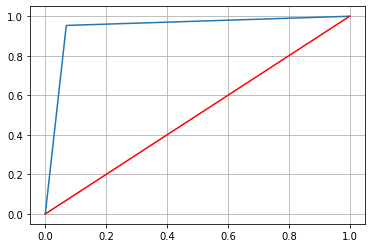

In [78]:
# type your code here
fpr,tpr,thresh=roc_curve(ytestfull,gb_ypred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r')
plt.grid()

<AxesSubplot: >

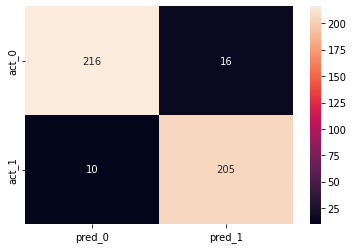

In [79]:
cm_gb=confusion_matrix(ytestfull,gb_ypred)
gb_matrix=pd.DataFrame(cm_gb,columns=['pred_0','pred_1'],index=['act_0','act_1'])
sns.heatmap(gb_matrix,annot=True,fmt='d')

<a id="xgb"> </a>
## 3. Extreme Gradient Boosting (XGBoost)

In [81]:
!pip install xgboost

     |████████████████████████████████| 1.8 MB 2.0 MB/s eta 0:00:01


In [83]:
# type your code here

from xgboost import XGBClassifier 
xgbc = XGBClassifier(learning_rate = 0.01, gamma = 2)
xgbc_mdl = xgbc.fit(xtrainfull,ytrainfull)
ypred_xgbc = xgbc_mdl.predict(xtestfull)
print(classification_report(ytestfull,ypred_xgbc))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       232
           1       0.85      0.79      0.82       215

    accuracy                           0.83       447
   macro avg       0.83      0.83      0.83       447
weighted avg       0.83      0.83      0.83       447



In [84]:
roc_auc_score(ytestfull,ypred_xgbc)

0.8285384923817162

Given list of values:

        n_estimators = [100, 120, 150],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        gamma = [2, 3, 4, 5, 6],
        max_depth = [2, 3, 4, 5, 6]

In [85]:
# type your code here
xgbc = XGBClassifier()
params = {'n_estimators':[100, 120, 150],
          'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
         'max_depth':[2, 3, 4, 5, 6],
         'gamma':[2, 3, 4, 5, 6]}
gsv_mdl = GridSearchCV(xgbc,param_grid=params)
mdl_tun =  gsv_mdl.fit(xtrainfull,ytrainfull)

In [86]:
mdl_tun.best_params_

{'gamma': 2, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 100}

In [87]:
# type your code here
xgbc_tun = XGBClassifier(n_estimators = 100,gamma = 2,learning_rate = 0.1,max_depth = 6)
xgbc_tun_mdl = xgbc_tun.fit(xtrain,ytrain)
ypred_xgbc_tun_test = xgbc_tun.predict(xtest)

In [88]:
confusion_matrix(ytest,ypred_xgbc_tun_test)

array([[192,  53],
       [ 57, 145]])

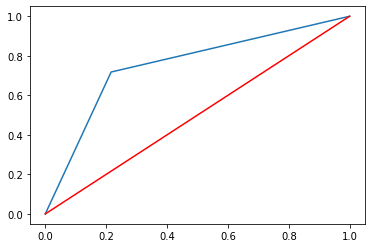

In [93]:
# type your code here
fpr,tpr,threshod = roc_curve(ytest,ypred_xgbc_tun_test)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r')
plt.show()

In [90]:
# type your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier

In [91]:
base_learners = [('dc_mdl',DecisionTreeClassifier()) ,
                 ('rf_mdl',RandomForestClassifier())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = AdaBoostClassifier())

# fit the model on train dataset
stck_mdl = stack_model.fit(xtrainfull, ytrainfull)

In [94]:
ypred_stck = stck_mdl.predict(xtest)
roc_auc_score(ytest,ypred_stck)

0.8069407961204283

In [95]:
# type your code here
base_learners = [('dc_mdl',DecisionTreeClassifier()) ,
                 ('rf_mdl',RandomForestClassifier())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GradientBoostingClassifier())

# fit the model on train dataset
stck_mdl = stack_model.fit(xtrain, ytrain)
ypred_stck = stck_mdl.predict(xtest)
roc_auc_score(ytest,ypred_stck)

0.8159729238229945